![ModernHouseForSale](Images/Modern%20House%20for%20Sale.png)

**Authors**: Joyleen Cherono, Colins Wanjao, Anita Bosibori, Ruth Kamau, Bernard Kinyua, Janet Atunga

**Date created**: 19-12-2023

**Discipline**: Data Science PT-05

# **Unlocking Property Value: A Strategic Guide for Homeowners**

## Executive Summary

In our quest to navigate the elaborate landscape of real estate, this project employs multiple linear regression modeling to empower homeowners with actionable insights. As market analysts specializing in real estate, our focus is on discovering the nuanced relationships between diverse property features and their influence on home sale prices. By diving into the King County House Sales data set, we aim to provide invaluable recommendations to homeowners seeking to enhance the estimated value of their properties through strategic renovations.

## Business Problem

In this project, the focus is on addressing a crucial challenge faced by a market analyst specializing in real estate. The primary business problem revolves around providing insightful recommendations to homeowners, empowering them to make strategic decisions regarding home renovations that maximize the estimated value of their properties. The goal is to equip homeowners with actionable insights, enabling them to navigate the competitive real estate market intelligently.

For the market analyst, key questions include:

- Renovation Impact Assessment: How do various types of home renovations correlate with changes in the estimated value of a property, as observed in the market?

- Identifying Renovation Priorities: Which specific renovations contribute most significantly to increasing property value, and how can homeowners prioritize these improvements based on market trends?

- Optimizing Return on Investment: What renovations offer the best return on investment for homeowners, considering both cost and their impact on property value within the current market context?

Leveraging multiple linear regression modeling, the project seeks to unravel the intricate relationships between various property features and their influence on home sale prices. The ultimate goal is to provide the market analyst with actionable insights, enhancing their ability to guide homeowners effectively in making informed decisions amidst the dynamic real estate landscape.

## Data Understanding

In order to address the market analyst's objectives effectively, a comprehensive understanding of the dataset is crucial. The dataset, sourced from the King County House Sales dataset, comprises various features that can offer valuable insights into the dynamics of the real estate market. Each row represents a unique house sale, while columns encompass diverse aspects such as square footage, condition, grade, and renovation history.

Key Features:

`Square Footage:` The living space's square footage serves as a crucial metric, influencing the property's market value. Understanding the distribution of this feature will provide insights into the general size preferences in the market.

`Condition and Grade:` The condition and grade of a house play pivotal roles in determining its attractiveness to potential buyers. Analyzing the distribution and relationships of these features will uncover patterns that can guide market strategies.

`Number of Floors:` The number of floors can impact both aesthetics and functionality. Exploring how this feature correlates with sale prices will shed light on the market's preference for certain architectural styles.

`Waterfront and View:` Properties with waterfront locations or scenic views often command premium prices. Examining the prevalence of such features in the dataset will guide recommendations on marketing strategies.

`Renovation History:` Houses that underwent recent renovations tend to have higher market values. Exploring the distribution of renovated properties and their impact on sale prices will be essential for advising homeowners on strategic improvements.

## Data Preparation

In [1]:
# importing standard packages

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy import stats
import statsmodels.api as sm
import statsmodels.graphics as smg
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor



### Data Loading and Inspection

In [2]:
# Load and preview the dataset

data = pd.read_csv("Data/kc_house_data.csv")
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# viewing the metadata of our 'data' df

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Dealing with Missing Values

In [4]:
# Summary of total missing values per column

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
data.view.unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [6]:
# View a sample of homes with null values for 'view'

null_views = data[data['view'].isna()]
null_views.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,8961960160,10/28/2014,480000.0,4,2.50,3230,16171,2.0,NO,NaN,...,9 Better,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,7853210060,4/6/2015,430000.0,4,2.50,2070,4310,2.0,NO,NaN,...,7 Average,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,3456000310,8/4/2014,840000.0,4,1.75,2480,11010,1.0,NO,NaN,...,9 Better,1630,850.0,1966,NaN,98040,47.5378,-122.219,2770,10744
487,1895000260,7/21/2014,207950.0,2,2.00,890,5000,1.0,NO,NaN,...,6 Low Average,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000


In [7]:
# Viewing coordinates on OpenStreetMap for Houses with null views

import folium
from folium.plugins import MarkerCluster

# Getting the average latitude

average_latitude = null_views.lat.mean()

# Getting average longitude

average_longitude = null_views.long.mean()

# Create a folium map centered around the average location
mymap = folium.Map(location=[average_latitude, average_longitude], zoom_start=12)

# Adding markers 

marker_cluster = MarkerCluster().add_to(mymap)

for index, row in null_views.iterrows():
    folium.Marker([row['lat'], row['long']], popup=f"House {index}").add_to(marker_cluster)


# display the map

mymap


In [8]:
# Checking the same for null values for Waterfront Column

null_waterfront = data[data['waterfront'].isna()]

# Getting the average latitude

average_latitude = null_waterfront.lat.mean()

# Getting average longitude

average_longitude = null_waterfront.long.mean()

# Create a folium map centered around the average location
mymap = folium.Map(location=[average_latitude, average_longitude], zoom_start=12)

# Adding markers 

marker_cluster = MarkerCluster().add_to(mymap)

for index, row in null_waterfront.iterrows():
    folium.Marker([row['lat'], row['long']], popup=f"House {index}").add_to(marker_cluster)


# display the map

mymap


Using a combination of the above interactive maps and sampling a few houses on Google Street View, it is apparent that
a vast majority of these units do not have a notable view/ waterfront. This suggests that the null values can be filled in accordingly. The assumption here is that it will not affect our analysis adversely.

In [9]:
# Filling missing values in the 'view' and 'waterfront' columns

data['waterfront'].fillna('NO', inplace=True)
data['view'].fillna('NONE', inplace=True)

# verifying the operation was successful

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
data.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
data.yr_renovated.isna().sum()

3842

This particular column exhibits 3,842 missing values. Moreover, 17,011 entries indicate a 'yr_renovated' value of 0, presumably signifying that the residence underwent no renovation. Combined, these instances represent over 96% of the dataset. Instead of imputing these values with arbitrary numbers, a more informative approach would be to create a new column indicating whether the property underwent renovation in the decade preceding its sale.

In [12]:
yr_renovated = data["yr_renovated"]
yr_sold = data['date'].str[-4:].astype(int)
data['renovated_last_10'] = (yr_renovated >= (yr_sold - 10))
data['renovated_last_10'] = data['renovated_last_10'].map({True: 'Yes', False: 'No'})
# Keeping this as a string for now in order to group it with categorical variables later.
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_last_10
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,No
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,No


In [13]:
# dropping the 'yr_renovated' column from our DataFrame

data.drop('yr_renovated', axis=1, inplace=True)

In [14]:
# Verifying the column was successfully dropped

print(data.columns)

# Confirming no missing values are left in any of our columns

print(data.isna().sum())

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated_last_10'],
      dtype='object')
id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
renovated_last_10    0
dtype: int64


In [15]:
### Asserting that dtypes are correct

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   date               21597 non-null  object 
 2   price              21597 non-null  float64
 3   bedrooms           21597 non-null  int64  
 4   bathrooms          21597 non-null  float64
 5   sqft_living        21597 non-null  int64  
 6   sqft_lot           21597 non-null  int64  
 7   floors             21597 non-null  float64
 8   waterfront         21597 non-null  object 
 9   view               21597 non-null  object 
 10  condition          21597 non-null  object 
 11  grade              21597 non-null  object 
 12  sqft_above         21597 non-null  int64  
 13  sqft_basement      21597 non-null  object 
 14  yr_built           21597 non-null  int64  
 15  zipcode            21597 non-null  int64  
 16  lat                215

In [16]:
# Getting the columns of 'object' dtype

object_column_names = data.select_dtypes(include=['object']).columns.tolist()
object_column_names


['date',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'renovated_last_10']

For our analysis, it would be more suitable to convert the data type of the 'date' column to a datetime object and the 'sqft_basement' column to the float64 type.


In [17]:
# converting 'date' column to datetime object

data["date"] = pd.to_datetime(data.date)

In [18]:
# converting 'sqft_basement' to float64type

try:
    data['sqft_basement'] = data['sqft_basement'].astype('float64')
except ValueError as e:
    print(f"Error: {e}")


Error: could not convert string to float: '?'


In [19]:
# Investigating the values within this column that are impeding the change

data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1135.0        1
4820.0        1
1245.0        1
1525.0        1
2300.0        1
Name: sqft_basement, Length: 304, dtype: int64

It appears that 454 cells have this "?" symbol that's preventing the change to float64 datatype. Besides that, there are 12826 units with sqft_basement = 0.0. It is unclear whether these values mean:

- there is no basement
- there is a basement but it's unfinished
- something else

To avoid the risk of making false assumptions, this column shall be dropped

In [20]:
# dropping 'sqft_basement' column from our DataFrame

data.drop('sqft_basement', axis=1, inplace=True)

In [21]:
# confirming the column has been dropped

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21597 non-null  int64         
 1   date               21597 non-null  datetime64[ns]
 2   price              21597 non-null  float64       
 3   bedrooms           21597 non-null  int64         
 4   bathrooms          21597 non-null  float64       
 5   sqft_living        21597 non-null  int64         
 6   sqft_lot           21597 non-null  int64         
 7   floors             21597 non-null  float64       
 8   waterfront         21597 non-null  object        
 9   view               21597 non-null  object        
 10  condition          21597 non-null  object        
 11  grade              21597 non-null  object        
 12  sqft_above         21597 non-null  int64         
 13  yr_built           21597 non-null  int64         
 14  zipcod

Converting **yr_built** to **Age**

In [22]:
data['Age'] = (data['date'] - pd.to_datetime(data['yr_built'], format='%Y')).dt.days // 365
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_last_10,Age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,1955,98178,47.5112,-122.257,1340,5650,No,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,1951,98125,47.7210,-122.319,1690,7639,No,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,1933,98028,47.7379,-122.233,2720,8062,No,82


**Bulk dropping Columns**

The listed variables either remain constant for home sellers or contribute limited valuable information.As for the 'date' variable, all homes in this dataset were sold within the timeframe of May 2014 to May 2015.

Variables:
- id
- date
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

In [23]:
# list the columns to drop
columns_to_drop = ['id',
                   'date',
                   'zipcode',
                   'lat',
                   'long',
                   'sqft_living15',
                   'sqft_lot15']
data.drop(columns_to_drop, axis=1, inplace=True)

In [24]:
#confirming successful operation
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,renovated_last_10,Age
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,1955,No,59
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,1951,No,63
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,1933,No,82


### Dealing with Categorical Variables

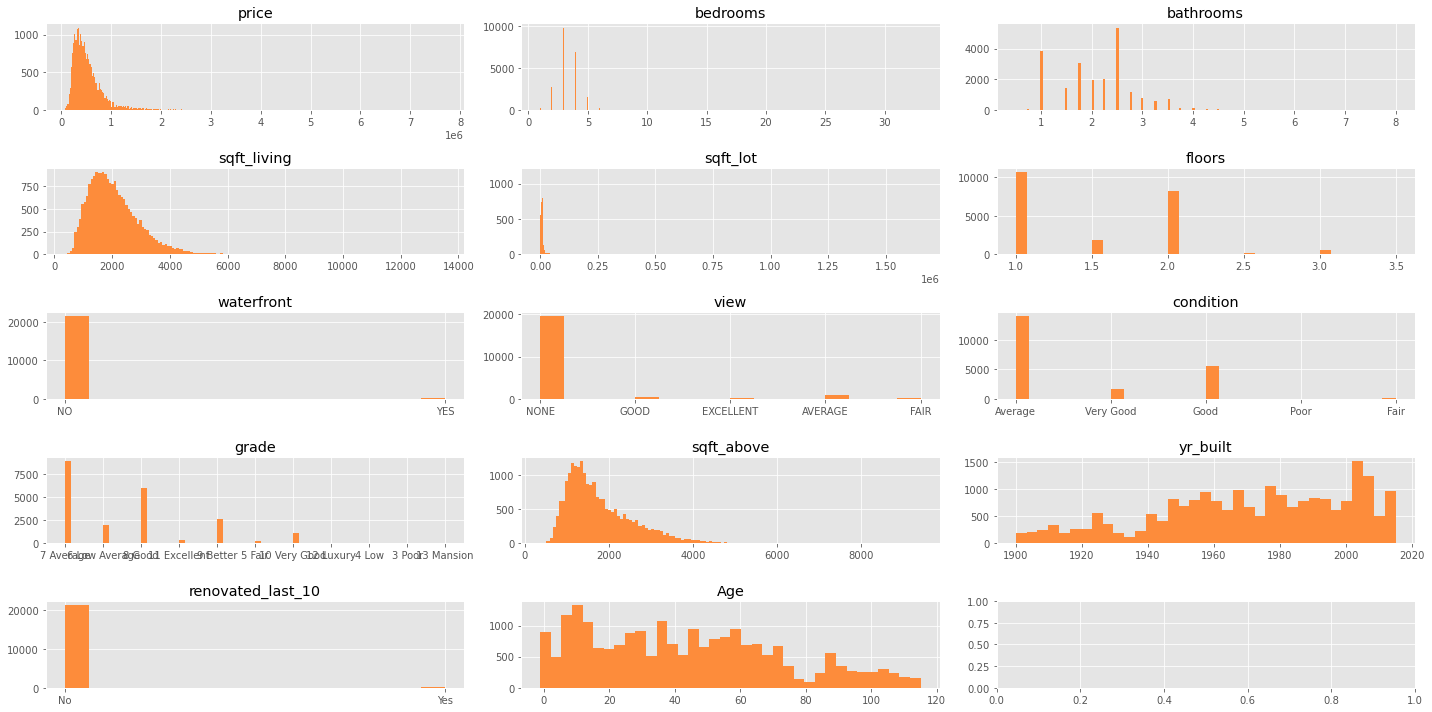

In [25]:
#Creating a histogram for each column of the dataframe:

fig, axes = plt.subplots(nrows=(5), ncols=3, figsize=(20,10))
df_cols = data.columns

color = sns.color_palette("Oranges", n_colors=1)[0]

for col, ax in zip(df_cols, axes.flatten()):
    ax.hist(data[col].dropna(), bins='auto', color=color )
    ax.set_title(col)
    
fig.tight_layout()

The histograms clearly show which features have continuous variables, and those that do not. Thus, the following shall be treated as categorical variables:

- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- renovated_last_10

Eliminating Noise: If a category appears in the dataset less than 50 times, it will be dropped from the dataset

In [26]:
cats = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'renovated_last_10']

for c in cats:
    # get value counts
    counts = data[c].value_counts()
    # Isolate offending categories for each variable
    bad_cats = counts[counts < 50].index
    # Isolate indices in the dataset where offending categories are found
    to_drop = data[data[c].isin(bad_cats)].index
    # Drop
    data.drop(to_drop, inplace=True)

According to the histograms of our variables, 'view' , 'revovated_last_10', and 'waterfront' can be binarized (using 1 & 0)


In [27]:
# Binarizing view
view_dict = {
    'FAIR': 1,
    'AVERAGE': 1,
    'GOOD': 1,
    'EXCELLENT': 1,
    'NONE': 0
}

data['view'] = data['view'].map(view_dict)

# Binarizing waterfront
waterfront_dict = {
    'YES': 1,
    'NO': 0
}

data['waterfront'] = data['waterfront'].map(waterfront_dict)

# Binarizing renovated_last_10
renovated_dict = {
    'Yes': 1,
    'No': 0
}

data['renovated_last_10'] = data['renovated_last_10'].map(renovated_dict)

#### One Hot Encoding: Generating Dummy Variables

In [28]:
# Saving a copy of the dataset in its current state just in case
data_before_dummies = data.copy()
# data_before_dummies.to_csv('./data/data_before_dummies.csv')

In [29]:
data.dtypes

price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
waterfront             int64
view                   int64
condition             object
grade                 object
sqft_above             int64
yr_built               int64
renovated_last_10      int64
Age                    int64
dtype: object

In [30]:
# converting 'bedroom', 'bathrooms', 'floors' to strings so that pandas can dummify them

col = ['bedrooms', 'bathrooms', 'floors']
data[col] =  data[col].astype(str)

In [31]:
data.dtypes

price                float64
bedrooms              object
bathrooms             object
sqft_living            int64
sqft_lot               int64
floors                object
waterfront             int64
view                   int64
condition             object
grade                 object
sqft_above             int64
yr_built               int64
renovated_last_10      int64
Age                    int64
dtype: object

In [32]:
# Defining the types of variables in the cleaned dataset

data_binary = data[['waterfront', 'view', 'renovated_last_10']]
data_num = data[['price', 'sqft_living', 'sqft_lot', 'Age']]
data_cat = data[['floors', 'bedrooms', 'bathrooms', 'condition', 'grade']]

In [33]:

# Applying one-hot encoding to the categorical features
# I am intentionally not dropping the first dummy arbitrarily.
# Instead, I will specify which specific dummy to drop
# to enhance the interpretability of model coefficients.

data_cat_dummies = pd.get_dummies(data_cat, dtype=int)


In [34]:
# specifying the dummies to drop 

dummies_to_drop = [
    'floors_1.0', 
    'bedrooms_1', 
    'bathrooms_0.75', 
    'condition_Fair', 
    'grade_5 Fair'
    ]

data_cat_dummies.drop(
    dummies_to_drop,
     axis = 1,
     inplace=True)

In [35]:
# Merge all the variables back together

data = pd.concat([data_num, data_binary, data_cat_dummies], axis=1)

# preview 

data.head() 

,price,sqft_living,sqft_lot,Age,waterfront,view,renovated_last_10,floors_1.5,floors_2.0,floors_2.5,...,condition_Average,condition_Good,condition_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,1180,5650,59,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,538000.0,2570,7242,63,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,180000.0,770,10000,82,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,604000.0,1960,5000,49,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,510000.0,1680,8080,28,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [36]:
# inspecting column order

data.columns

Index(['price', 'sqft_living', 'sqft_lot', 'Age', 'waterfront', 'view',
       'renovated_last_10', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_1.75',
       'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75',
       'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75',
       'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'condition_Average',
       'condition_Good', 'condition_Very Good', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better'],
      dtype='object')

In [37]:
# Rearranging the grade columns
# List of grade-related column prefixes
grade_columns = [
    'grade_6 Low Average',
    'grade_7 Average',
    'grade_8 Good',
    'grade_9 Better',
    'grade_10 Very Good',
    'grade_11 Excellent',
    'grade_12 Luxury'
]

# Extracting other columns not related to 'grade'
other_columns = [col for col in data.columns if col not in grade_columns]

# Reordering columns
reordered_columns = other_columns + grade_columns
data = data[reordered_columns]

In [38]:
data.columns

Index(['price', 'sqft_living', 'sqft_lot', 'Age', 'waterfront', 'view',
       'renovated_last_10', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_1.75',
       'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75',
       'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75',
       'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'condition_Average',
       'condition_Good', 'condition_Very Good', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury'],
      dtype='object')

In [39]:
data.head()

,price,sqft_living,sqft_lot,Age,waterfront,view,renovated_last_10,floors_1.5,floors_2.0,floors_2.5,...,condition_Average,condition_Good,condition_Very Good,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury
0,221900.0,1180,5650,59,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,538000.0,2570,7242,63,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,180000.0,770,10000,82,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,604000.0,1960,5000,49,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,510000.0,1680,8080,28,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Building a `Baseline Model`

In [40]:
# Checking for linear relationships between our variables and 'price' (target)
# isolating continuous variables

data_num.head()

,price,sqft_living,sqft_lot,Age
0,221900.0,1180,5650,59
1,538000.0,2570,7242,63
2,180000.0,770,10000,82
3,604000.0,1960,5000,49
4,510000.0,1680,8080,28


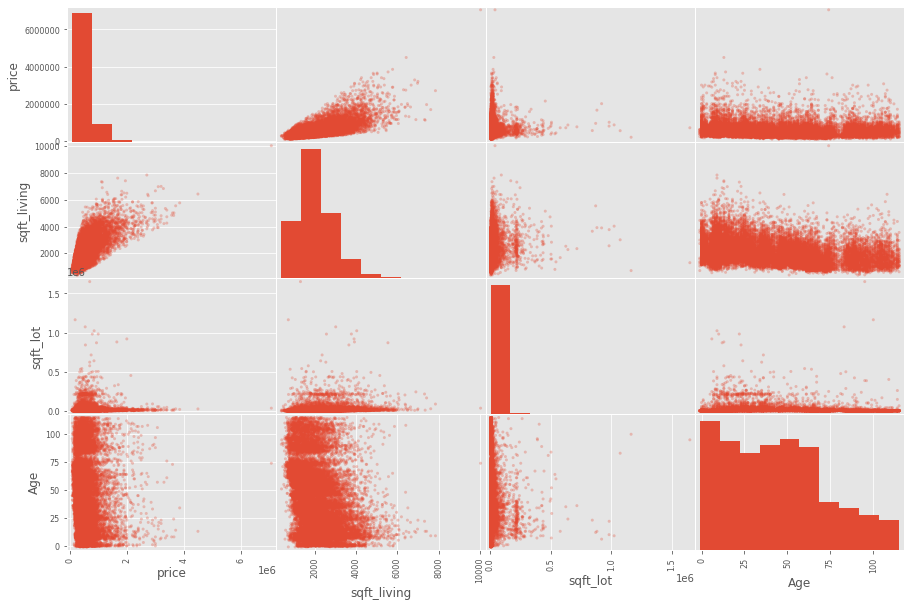

In [41]:
pd.plotting.scatter_matrix(data_num, figsize=(15,10), alpha=.3);

# Set background color
plt.gcf().set_facecolor('white')

In [42]:
# Displaying the correlation matrix with respect to the 'price' column in descending order

data_num.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.682342
sqft_lot       0.084739
Age           -0.048722
Name: price, dtype: float64

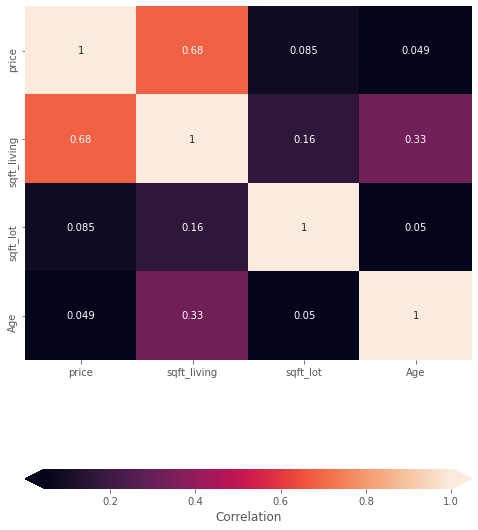

In [43]:
# Visualizing the correlations using a heatmap

fig, ax = plt.subplots(figsize = (8,10))

sns.heatmap(
    data_num.corr().abs(),
#     mask=np.triu(np.ones_like(data.corr(), dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

`Results`

- It is evident that the variable 'sqft_living' is the sole continuous feature exhibiting a clear linear correlation with 'price,'. 
- There is potential advantage in considering log transformations for both 'sqft_living' and the target variable, 'price.'

### Assessing Multicollinearity Across Predictor Combinations

In [44]:
# dropping 'price' column from our data_num df

predictor_df = data_num.drop('price', axis=1)

predictor_df = predictor_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
predictor_df['pairs'] = list(zip(predictor_df.level_0, predictor_df.level_1))
predictor_df.rename(columns={0: 'Coefficient'}, inplace=True)
predictor_df.set_index('pairs', inplace=True)
predictor_df.drop(columns=['level_1', 'level_0'], inplace = True)
predictor_df.drop_duplicates(inplace=True)
predictor_df

,Coefficient
pairs,
"(sqft_living, sqft_living)",1.000000
"(sqft_living, Age)",0.326556
"(sqft_living, sqft_lot)",0.164552
"(sqft_lot, Age)",0.049944


There seems to be negligible multicollinearity, so our model will not be adversely affected.Additionally, 'Age' and 'sqft_lot' seem not to have a linear relationship with price. 

In [45]:
# dropping these unnecessary columns

data_num.drop(['sqft_lot', 'Age'], axis=1, inplace=True)

In [46]:

def reg_qq_sced(y, X, add_constant=True, qq=True, sced=True):
    """
    Fit a linear regression model, display its summary, and output plots to check linear regression assumptions.

    Parameters:
    - y: Target variable.
    - X: Predictor variables.
    - add_constant: Whether to add a constant term to the predictors (default: True).
    - qq: Whether to display a QQ plot for residual normality check (default: True).
    - sced: Whether to display a plot of predicted values vs. residuals for homoscedasticity check (default: True).
    """
    # Add a constant to the predictors if required
    X_sm = sm.add_constant(X, has_constant='add') if add_constant else X

    # Run a linear regression and display the summary
    model = sm.OLS(y, X_sm).fit()
    display(print(model.summary()))

    # Display a QQ plot for residual normality check
    if qq:
        sm.qqplot(model.resid, line='45', fit=True)
        plt.title('QQ plot for residual normality check')
        plt.show()
    else:
        pass

    # Display a plot of predicted values vs. residuals for homoscedasticity check
    if sced:
        preds = model.predict(X_sm)
        residuals = model.resid
        fig_resid, ax = plt.subplots(figsize=(10, 5))
        fig_resid.suptitle('Predicted vs. residual plot for homoscedasticity check')
        ax.scatter(preds, residuals, alpha=0.2, color= "blue")
        ax.plot(preds, [0 for _ in range(len(X_sm))])
        ax.set_xlabel("Predicted Value")
        ax.set_ylabel("Actual - Predicted Value")
    else:
        pass

    # Output additional model performance metrics
    print(f'Model adjusted R-squared: {model.rsquared_adj}')
    print(f'Model RMSE: {np.sqrt(model.mse_resid)}')


### Baseline Model/ Model 1a

Since sqft_living is the feature with the strongest correlation with the target variable, let's build a simple linear regression with that, which will serve as the baseline model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                 1.862e+04
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:02:54   Log-Likelihood:            -2.9572e+05
No. Observations:               21378   AIC:                         5.914e+05
Df Residuals:                   21376   BIC:                         5.915e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9704.3054   4318.156     -2.247      

None

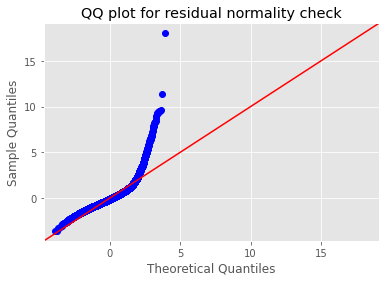

Model adjusted R-squared: 0.4655655910250339
Model RMSE: 246222.6375951674


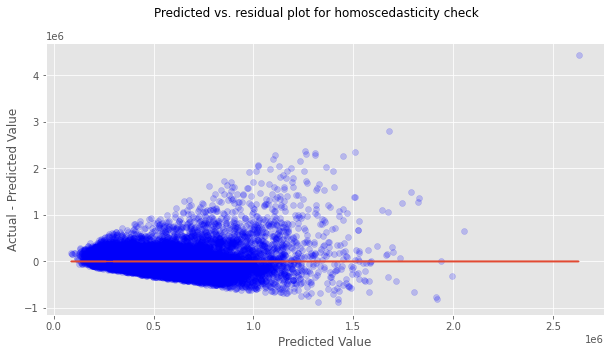

In [47]:
baseline = 'sqft_living'
y = data.price
X = data[baseline]

# Feeding these inputs into our function

reg_qq_sced(y, X)

`Baseline Model Results`

Looking at the summary above, we can see that the regression line we found was:

  $$ \hat{price} = -9704.3054 + 262.8635 sqft_living  $$


- The model is statistically significant overall, with an F-statistic p-value well below 0.05
- The model explains about 46.6% of the variance in price
  - This R-squared value is low
  - Indicates that the model is not a great fit.
- The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values below 0.05
- For each increase of 1 sqft_living, we see an associated increase in sale price by 262.8635
- After analyzing the QQ plot, it becomes evident that the assumption of normality for residuals is notably violated. This violation is similarly observed in the homoscedasticity check.





#### Enhancing Linearity through Log Transformations

In order to strengthen the linear relationship between the variables "price" and "sqft_living," it could be advantageous to apply log transformations to these two variables.

In [48]:
# Isolate columns to be transformed
log_trans_cols = ['price', 'sqft_living']
data_logged = data.copy()[log_trans_cols]

# Log transforming and renaming columns
data_logged = np.log(data_logged)
data_logged.columns = data_logged.columns.map(lambda x: 'log_' + x)

# Merge it with the rest of the dataset
data_transformed = data_logged.join(data.drop(log_trans_cols, axis=1))

In [49]:
# previewing df with log transformed columns

data_transformed.head()

,log_price,log_sqft_living,sqft_lot,Age,waterfront,view,renovated_last_10,floors_1.5,floors_2.0,floors_2.5,...,condition_Average,condition_Good,condition_Very Good,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury
0,12.309982,7.073270,5650,59,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,13.195614,7.851661,7242,63,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,12.100712,6.646391,10000,82,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,13.311329,7.580700,5000,49,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,13.142166,7.426549,8080,28,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


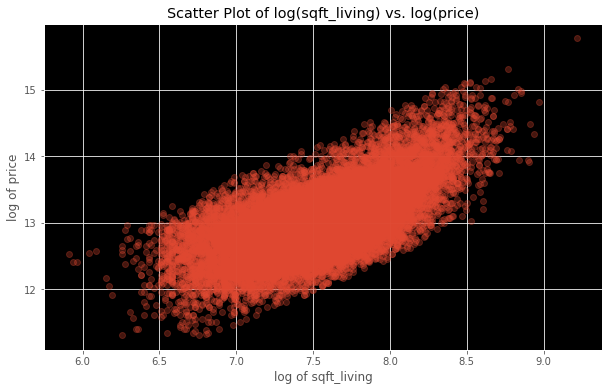

In [50]:
# visualizing linearity between the transformed predictor and target variable 

fig, ax = plt.subplots(figsize= (10,6))
ax = plt.gca()
plt.plot(data_transformed['log_sqft_living'], data_transformed['log_price'], 'o', alpha=0.3)
# Set the background color of the axis

ax.set_facecolor('black')
plt.gcf().set_facecolor('white')
plt.xlabel('log of sqft_living')
plt.ylabel('log of price')
plt.title('Scatter Plot of log(sqft_living) vs. log(price)')
plt.show()




A quick visual inspection reveals an improved relationship

### Baseline Model1b

This is a variant of the baseline model incorporating log transformed predictor and target variables

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.688e+04
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:02:56   Log-Likelihood:                -9972.4
No. Observations:               21378   AIC:                         1.995e+04
Df Residuals:                   21376   BIC:                         1.996e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.8236      0.048    1

None

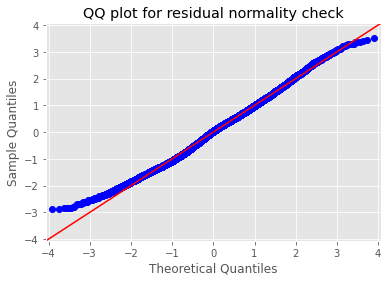

Model adjusted R-squared: 0.44121910929171493
Model RMSE: 0.3858085786927972


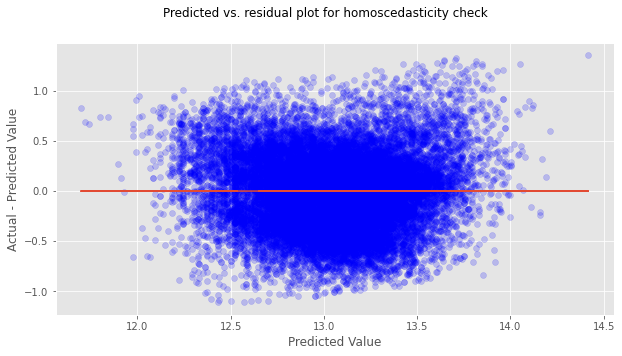

In [51]:
baseline = 'log_sqft_living'

y = data_transformed.log_price
X = data_transformed.log_sqft_living

# Feeding these inputs into our function

model = reg_qq_sced(y, X)

`Results`

- Although the coefficient of determination (R-squared) has experienced a slight decrease, notable improvements are observed in addressing concerns related to the normality of residuals and heteroscedasticity.

### Model 2

Baseline Model + Binary Values

**Predictor**
    -sqft_living
- binary variables 

    - waterfront
    - view
    - renovated_last_10

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     4933.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:02:57   Log-Likelihood:                -9203.6
No. Observations:               21378   AIC:                         1.842e+04
Df Residuals:                   21373   BIC:                         1.846e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.2015      0.04

None

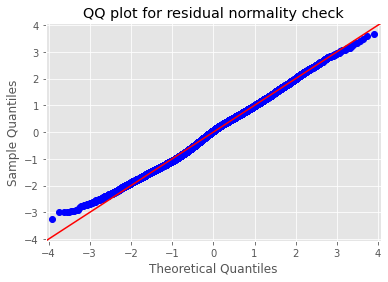

Model adjusted R-squared: 0.47992149934586026
Model RMSE: 0.3722078753617302


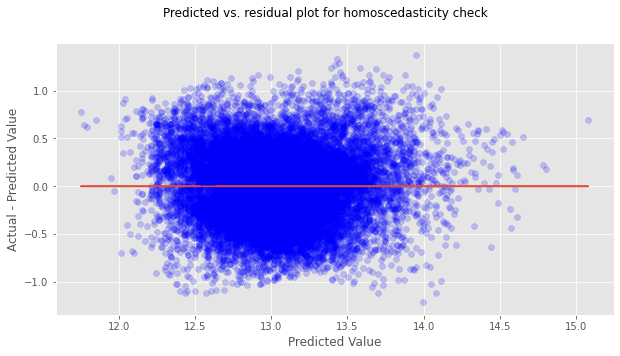

In [52]:
baseline = 'log_sqft_living'
y = data_transformed.log_price
X = data_transformed[[baseline, 'waterfront', 'view', 'renovated_last_10']]

model = reg_qq_sced(y, X)

`Results`
- Based on the summary, this is the relationship that we have modeled
$$ \large{ log(price) = \beta x \ldots } $$

Statistical Significance:
- The model is statistically significant, given the low p-value (Prob (F-statistic): 0.00).
- All predictor variables are statistically significant, as indicated by their low p-values (P>|t|).

- When all other predictors are zero, the expected house price is e^(7.2015), which is approximately 1330% higher.

**log_sqft_living**
- coefficient (0.7696): The expected change in log price for a one-unit increase in the log of sqft_living.
    - Interpretation: A one-unit increase in the log of sqft_living is associated with a 0.7696 increase in the expected log price.

**Waterfront (waterfront):**
- coefficient (0.5078): The expected change in log price for a house with a waterfront compared to one without.
    - Interpretation: Houses with a waterfront are expected to have a 0.5078 higher log price than those without.

**View (view):**
- coefficient (0.2787): The expected change in log price for a one-unit increase in the view score.
    - Interpretation: A one-unit increase in the view score is associated with a 0.2787 increase in the expected log price.

**Renovated Last 10 Years (renovated_last_10):**

- coefficient (0.2415): The expected change in log price for a house renovated in the last 10 years compared to one that hasn't been renovated.
    - Interpretation: Houses renovated in the last 10 years are expected to have a 0.2415 higher log price than those not renovated.

**Adjusted R-Squared**

- The proportion of the variance in the log of house prices explained by the model is about 48%, which is a marginal increase from our previous model

### Model 3

Baseline + Categorical Variables

**Predictors** 
- log_sqft_living

**categorical variables**
- floors
- bedrooms
- bathrooms
- condition
- grade

In [53]:
# first, we shall group the dummies together into lists

dummies = ['floors', 'bedrooms', 'bathrooms', 'condition', 'grade']
floors_dummies = []
bedrooms_dummies = []
bathrooms_dummies = []
condition_dummies = []
grade_dummies = []

for col in list(data.columns):
    for cat in dummies:
        if col.startswith(cat):
            eval(cat + '_dummies').append(col)


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     878.4
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:02:58   Log-Likelihood:                -6839.2
No. Observations:               21378   AIC:                         1.375e+04
Df Residuals:                   21343   BIC:                         1.403e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.8143    

None

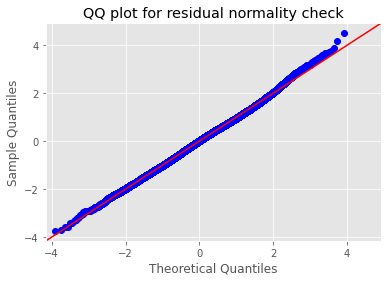

Model adjusted R-squared: 0.5825424094184519
Model RMSE: 0.3334703984977778


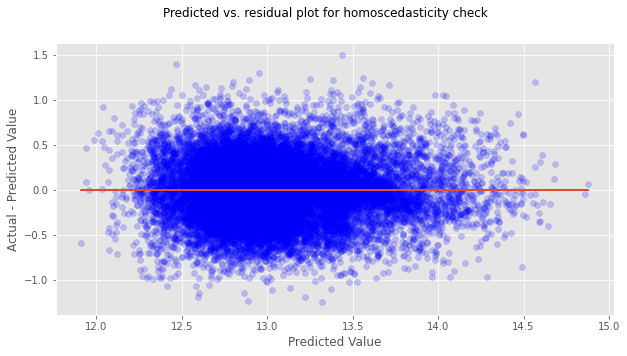

In [54]:
y = data_transformed.log_price
X = data_transformed[floors_dummies +
                     bedrooms_dummies +
                     bathrooms_dummies +
                     condition_dummies +
                     grade_dummies +
                     ['log_sqft_living']]

model = reg_qq_sced(y, X)

`Results`

**Model Fit and Significance:**
- R-squared (0.583) and Adjusted R-squared (0.583):

    - Approximately 58.3% of the variability in log house prices is explained by the model.
    - The model provides a reasonably good fit to the data.
- F-statistic (878.4, Prob (F-statistic): 0.00):
    -The model is statistically significant, indicating at least one predictor is useful in predicting log house prices.

**Interpretation of Dummy Variables (e.g., floors_1.5, bedrooms_2, etc.):**

- Positive coefficients indicate an increase in log house price compared to the reference category.
- Negative coefficients, especially prevalent in bedroom and bathroom dummy variables, appear counterintuitive as they suggest a decrease in log house price compared to the reference categories, which were dropped. This makes no sense. 

**Grade Categories:**
- Higher-grade categories are associated with higher log house prices.
For example, moving from "Average" grade to "Luxury" grade is associated with an increase of approximately 138.19% in log house price.
    

###  Model 4

In this last model, bedroom and bathroom categories will be dropped and binary variables from model 2 will be added back

**Predictors**
- log_sqft_living

**binary variables**
- view
- waterfront
- renovated_last_10

**categorical variables**
- floors
- condition
- grade

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     1709.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:02:59   Log-Likelihood:                -6659.6
No. Observations:               21378   AIC:                         1.336e+04
Df Residuals:                   21359   BIC:                         1.351e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.5268    

None

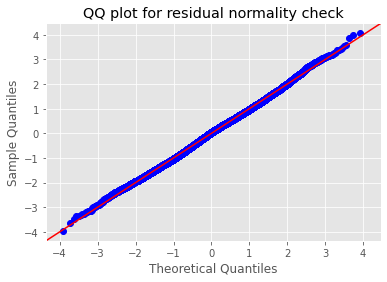

Model adjusted R-squared: 0.5898050113220741
Model RMSE: 0.3305569423039113


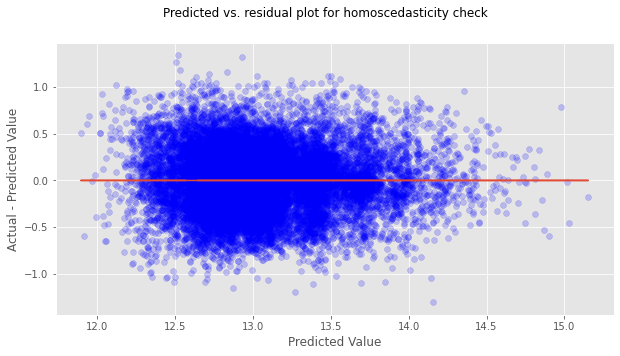

In [55]:
y = data_transformed.log_price
X = data_transformed[floors_dummies +
                     condition_dummies +
                     grade_dummies +
                     ['view']+
                     ['waterfront']+
                     ['renovated_last_10']+
                     ['log_sqft_living']]

model = reg_qq_sced(y, X)

`Results`

**Model Fit:**

- The model has an R-squared of 0.590, indicating that approximately 59% of the variability in the logarithm of house prices is explained by the independent variables in the model.
- The Adjusted R-squared is also 0.590, suggesting that the model fit remains consistent even when accounting for the number of predictors.

**Significant Predictors:**

- All independent variables are statistically significant in predicting house prices (logarithmically transformed).
- Variables with low p-values (P>|t|) and consequently high t statistics such as floors_1.5, floors_2.0, condition_Very Good, grade_6 Low Average, grade_7 Average, grade_8 Good, grade_9 Better, grade_10 Very Good, grade_11 Excellent, grade_12 Luxury, view, waterfront, renovated_last_10, and log_sqft_living are likely important in predicting house prices.

**Interpretation of Coefficients:**

- Positive coefficients (e.g., floors_1.5, floors_2.5, grade_6 Low Average, etc.) suggest an increase in the logarithm of house prices for a one-unit increase in the corresponding variable, holding other variables constant.
- Negative coefficients (e.g., floors_2.0) suggest a decrease in the logarithm of house prices for a one-unit increase in the corresponding variable.

**Influence of Grades:**

- There is a clear trend where higher-grade categories (grade_8 Good, grade_9 Better, grade_10 Very Good, grade_11 Excellent, grade_12 Luxury) have higher positive coefficients, indicating that houses with higher grades tend to have higher prices.

## **Conclusion**

In the latest iteration of our predictive model, we've pushed the Adjusted R-squared score to a solid 0.590. What does this mean for you as a homeowner? Well, it opens up a clearer window into what makes your property tick in the market. Here's a straightforward breakdown:

**Square Footage of Living Space:**
Bigger living spaces mean a higher price tag. If you're mulling over renovations, adding some extra square footage could significantly bump up your house's expected sale price.

**Condition of the House (Maintenance):**
Keeping your house in good shape pays off. The model underscores that moving up the maintenance ladder (starting from "Cond_Fair") directly correlates with a better sale price. So, those small fixes might be worth the effort.

**Grade of the House (Quality of Construction):**
A higher grade fetches a higher price. If you're up for it, investing in improving your home's construction quality and design could be a smart move to prop up its market value.

**Number of Floors:**
More floors generally mean a higher sale price, but there's a twist. The model throws a curveball in interpreting changes from 1 to 1.5 floors and 1 to 2 floors. Adding floors can boost your price, but whether it's worth the cost is something worth considering.

**Waterfront and View:**
Homes with a nice view or a spot by the waterfront sell at a premium. If your place has these perks, make sure your real estate agent showcases them prominently in listings and marketing materials.

**Renovated in the Last 10 Years:**
Recent renovations are a sweet spot. They not only contribute to a better condition and grade but also have a direct link to a higher sale price. Showcase those recent upgrades in your listing to attract savvy buyers.

In a nutshell, this model isn't just about numbers; it's your guide to making well-informed real estate moves. Whether it's a square footage boost, a maintenance checklist, or playing up your home's scenic perks, these insights are your secret weapon to maximize your property's value.

**Limitations**

The final model, while insightful, does present certain limitations that should be acknowledged:

`Prediction in Dollar Terms:` The model's limitation lies in its inability to predict the precise effect on home sale prices in dollar terms. The transformation of the data by taking the natural log of both price and square footage was essential for meeting the assumptions of linear regression. However, this transformation diminishes the model's intuitiveness in interpreting the monetary impact of variables. While the model effectively communicates whether a variable increases or decreases a home sale price and provides the relative magnitude of the change, determining the exact dollar effect necessitates more advanced calculations. This limitation could be a constraint for individuals seeking detailed insights into the financial implications of specific actions, such as evaluating the return on investment for a renovation.

`Adjusted R-squared Score:` Another noteworthy limitation pertains to the adjusted R-squared score of the final model, which stands at 0.59. While this score indicates a reasonable explanatory power of the predictors, it falls short of being exemplary. It implies that 41% of the variation in home sale prices remains unaccounted for by the chosen predictors. While the model can still offer meaningful inferences regarding the direction and magnitude of price changes with varying predictors, stakeholders should exercise caution, recognizing that a considerable portion of the price variation remains unexplained. This limitation underscores the complexity inherent in capturing the multitude of factors influencing real estate prices.